In [1]:
import simulationlib as sl
import lasinglib as ll
import measurelib as ml
%matplotlib widget
import annealing_database2 as adb2

import modulators as mo
import shapes

import numpy as np
import matplotlib.pyplot as plt

import logging
import os


DBPATH = r".\annealing records\50um Al ASB New Database\50um Al ASB.dill"
database = adb2.DatabaseWrapper(DBPATH)

# write directly to TAP directory...
TAP_dbpath = r"C:\Users\ssuub\Desktop\MPSD-TAP\TAPV-2\Application\pythonFiles\DataTextFiles"

In [3]:
# This works for most sequences and is reasonably fast to simulate
CHIP = sl.SimGrid(dimension=32, resolution=101, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

SILICON = sl.Material(diffusivity=88, emissivity=0.09, specific_heat=0.7, density=0.002329002)

# 19.9.2024 actually usable coord area with a reasonable fraction of full intensity:
# this is due to bad calibration
# x_domain = [2.5, 32.5] # x = 2.5 should be xmin = 1, x=32.5 should be xmax = 31
# y_domain = [-4, 26] # y = -4 should be ymin = 1, y = 26 should by ymax = 31

# make sure these line up with the ones declared in TAP's settings; these are used to zero edges out better.
CENTERING_OFFSETS = (-2, -1.5)
PULSE_PROFILING_LOCATION = (24, 27)

LaserSequence(['Pulse(9.000W, 0.000 + 60.000S -> 60.0001MOD)']) 1


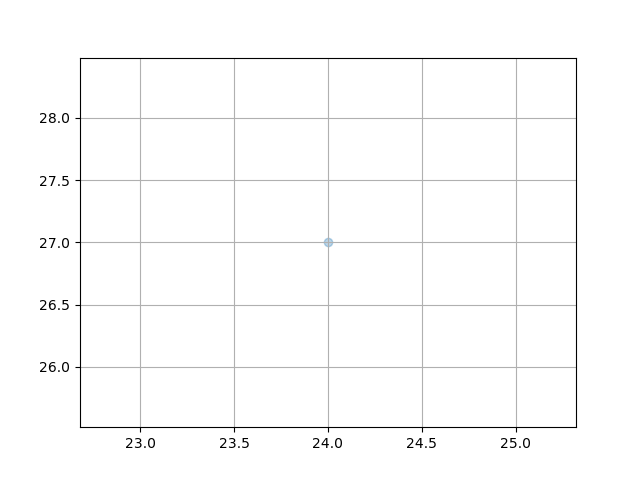

In [21]:
# Design your annealing cycle here
pulses = []

# shadow test
# notes="6W test 2 30min if no shadow, vacuum trial"
# MAX_TEMP_LOCATION = (23, 23) 
# shadowtest_power = 6 # W

# shadowtest = ll.LaserPulse(grid=CHIP, start=0, duration=1, position=MAX_TEMP_LOCATION, power=shadowtest_power, sigma=ll.DEFAULT_LASER_SIGMA)
# seq = ll.LaserSequence([shadowtest] * 60, delay=29, start_time=0)

# edge experiment generator
# notes="edge test 2, 1-14mm, 1 calibration @ 3mm then 14x1mm @22mm, 6-9W 7x0.5W 1s pulses, delay 10"
# x_positions = np.arange(1, 15, 1)
# print(x_positions)
# print(len(x_positions))
# powers = np.linspace(6, 9, 7)
# print(powers)
# print(len(powers))
# duration = 1
# ypos = 22

# for p in powers:
#     # calibration pulse
#     pulse = ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(3, ypos), power=p, sigma=ll.DEFAULT_LASER_SIGMA)
#     pulses.append(pulse)
#     for xpos in x_positions:
#         pulse = ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(xpos, ypos), power=p, sigma=ll.DEFAULT_LASER_SIGMA)
#         pulses.append(pulse)

# seq = ll.LaserSequence(pulses, delay=10, start_time=0)

# top-left edge probe
# power = 6 # W
# density = 33
# coords = np.linspace(0, 16, density)
# x, y = np.meshgrid(coords, coords)
# duration = 1
# notes = "top-left quadrant mapping, 0-16mm 0.5mm increments 10s interval PREHEAT to 29"

# for xpos, ypos in zip(x.flatten(), y.flatten()):
#     pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(xpos, ypos), power=power, sigma=ll.DEFAULT_LASER_SIGMA))


# seq = ll.LaserSequence(pulses, delay=9, start_time=0)

# # edge crossing probe
# power = 6 # W
# density = 112
# x = np.linspace(4, 32, density)
# y = 23
# duration = 1
# notes = "112 points 4-32mm @ y=23, 1s @ 10s intervals, 6W to characterize spar, nitrogen R2"

# for xpos in x:
#     pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(xpos, y), power=power, sigma=ll.DEFAULT_LASER_SIGMA))

# seq = ll.LaserSequence(pulses, delay=9, start_time=0)

# x, y = (8, 25)
# power = 6
# numpulses = 200
# duration = 1
# notes="affirm temperature readings do not change with shadow accumulation, 6Wx200 (8, 25)"
# pulse = ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, sigma=ll.DEFAULT_LASER_SIGMA)

# seq = ll.LaserSequence([pulse] * numpulses, delay=9, start_time=0)

# seq.build_trace()



# pulses = []
# delays = []
# times = np.arange(0.5, 3, 0.5)

# x, y = (8, 25)
# powers = np.linspace(5, 10, 21)

# overall_wait = 10 # seconds

# numpulses = 10

# notes="temp delta vs pulse power, 0.5-3s @0.5s, 5-10W @0.25 int, 10x pulses each"
# for duration in times:
#     for num, power in enumerate(powers):
        
#         pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, sigma=ll.DEFAULT_LASER_SIGMA))
#         if (num + 1) % len(powers) == 0:
#             delays.append(overall_wait * 3 - duration)
#         else:
#             delays.append(overall_wait - duration)

# print(len(delays))
# print(len(pulses))

# seq = ll.LaserSequence(pulses, delay=delays, start_time=0)

# pulses = []

# x, y = (-4, 15)
# power = 1 # W
# duration = 1
# overall_wait = 10 # seconds

# numpulses = 300

# notes="coarse search for minimum shadow threshold; 1W 1Sx300"

# for i in range(numpulses):
#     pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, sigma=ll.DEFAULT_LASER_SIGMA))

# seq = ll.LaserSequence(pulses, start_time=0, delay=overall_wait - duration)

pulses = []
numpulses = 1
x, y = PULSE_PROFILING_LOCATION
power = 9 # W
overall_wait = 61
duration = 60
a = 0.05
b = 0.05

mod = mo.double_exp(a, b)

notes=f"ramping test double exp a: {a} b: {b}"

for i in range(numpulses):
    pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, modulators=[mod],
                                sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses, start_time=0, delay=overall_wait - duration)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

LaserSequence(['Pulse(29.800W, 0.000 + 3.000S -> 3.000NOMOD)', 'Pulse(29.800W, 6.000 + 3.000S -> 9.000NOMOD)', 'Pulse(29.800W, 12.000 + 3.000S -> 15.000NOMOD)', 'Pulse(29.800W, 18.000 + 3.000S -> 21.000NOMOD)', 'Pulse(29.800W, 24.000 + 3.000S -> 27.000NOMOD)', 'Pulse(29.800W, 30.000 + 3.000S -> 33.000NOMOD)', 'Pulse(29.800W, 36.000 + 3.000S -> 39.000NOMOD)', 'and 994 additional pulse(s).']) 1


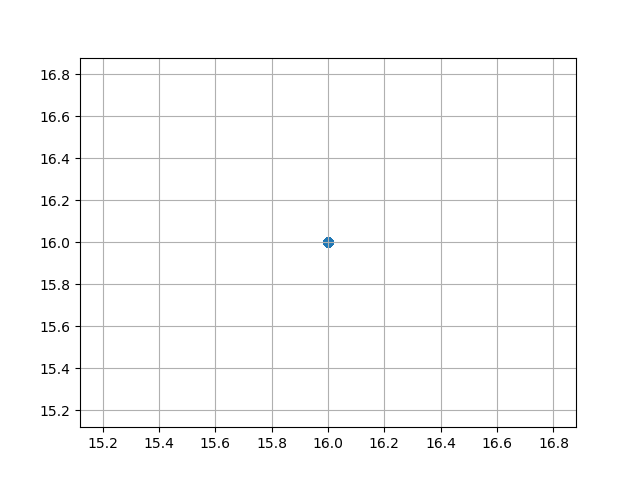

In [8]:
# Design your annealing cycle here

pulses = []
numpulses = 1000
x, y = 16, 16

power = 29.8 # W
duration = 3

notes=f"aluminum foil thermal cycling test"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses * numpulses, start_time=0, delay=3)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

In [ ]:
# simulate sequence if desired

sim = sl.Simulation(CHIP, SILICON, duration=seq.duration + 4, pulses=[seq], ambient_temp=300,
                    starting_temp=300, neumann_bc=False,
                    edge_derivative=0, sample_framerate=24, intended_pbs=1,
                    dense_logging=False, timestep_multi=0.75, radiation=True, progress_bar=True, silent=False)

sim.simulate()

In [ ]:
# animate
from IPython.display import HTML
ani = sim.animate(cmap="magma")
plt.close()
# use plt.show() for more rigorous examinations
HTML(ani.to_jshtml())

In [10]:
# write seq to TAP cycle code
seq.write_to_cycle_code(TAP_dbpath + "/michaeltest1.txt", 0.03, *CENTERING_OFFSETS)

In [23]:
# If you have actually fired this pattern on the chip, save it to the annealing database record!
database.write_sequence(seq, notes=notes)

CSV modified


CSV modified


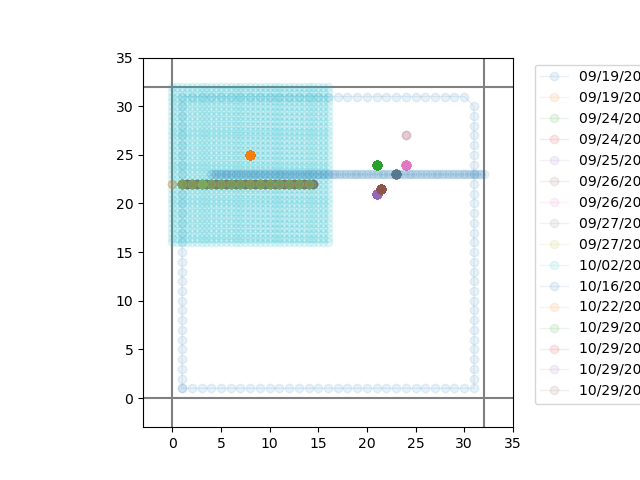

In [20]:
# view the current database entries
database.visualize()

In [ ]:
# backup database
database.backup(note="edgeR2")